In [3]:
import numpy as np
import plotnine as pn
import pandas as pd
pd.options.mode.copy_on_write = True
import patsy as pt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [4]:
# github.com/roualdes/data -> penguins
df = pd.read_csv("https://raw.githubusercontent.com/roualdes/data/refs/heads/master/penguins.csv")

Please make a scatter plot of bill depth (y-axis) on bill length (x-axis) and color the points by island.

/Users/edward/venvs/py3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


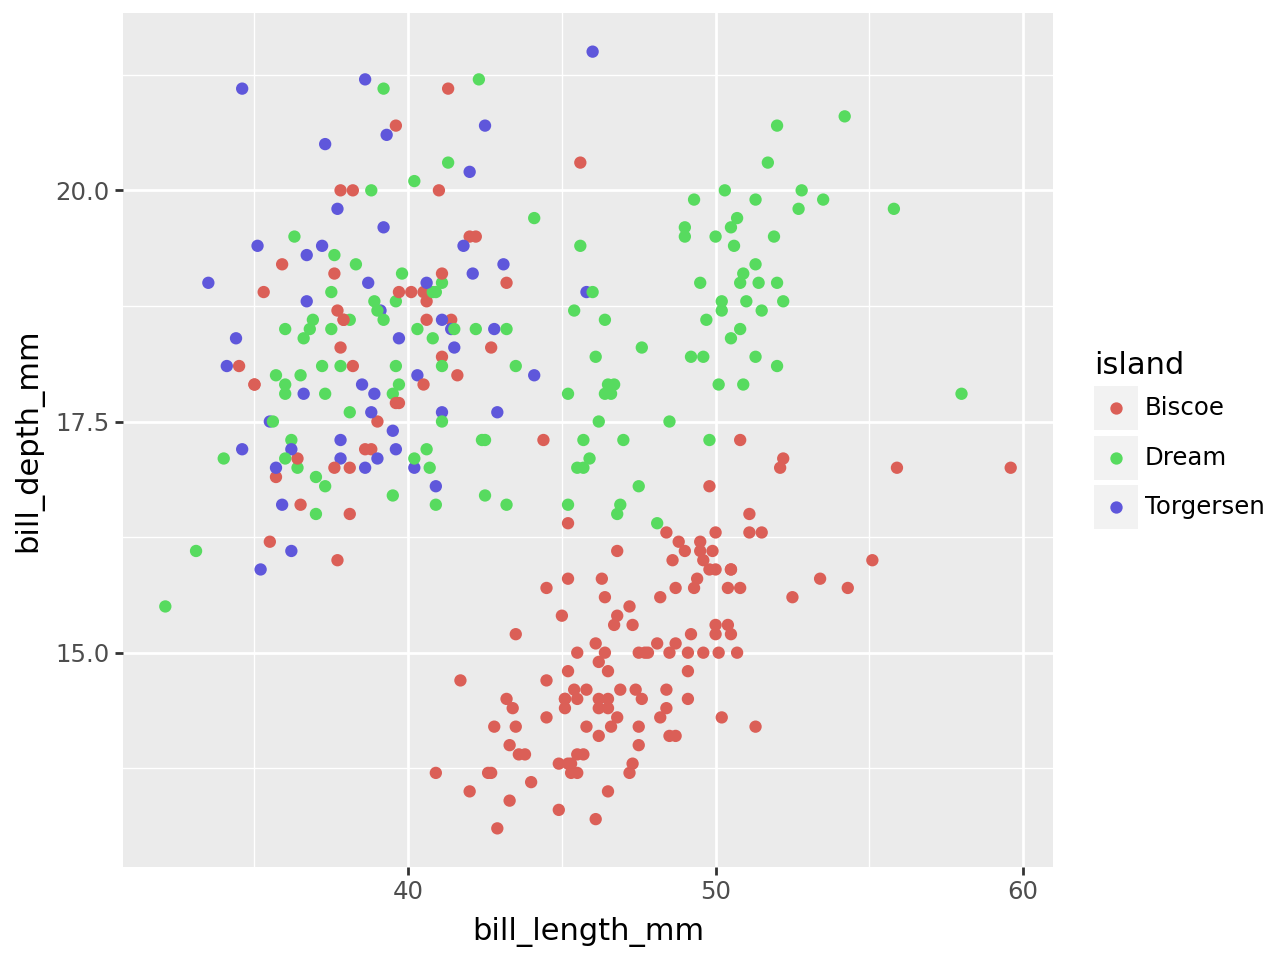

In [5]:
pn.ggplot(df) + \
    pn.geom_point(pn.aes("bill_length_mm", "bill_depth_mm", color = "island"))

In [6]:
df["biscoe"] = df["island"] == "Biscoe"
df["biscoe"] = df["biscoe"].astype("int64")

In [7]:
df2 = df.dropna(subset = ["biscoe", "bill_depth_mm"])
y, X = pt.dmatrices("biscoe ~ bill_depth_mm", df2)
y = np.reshape(y, -1)
fit = LogisticRegression(fit_intercept = False, penalty = None).fit(X, y)

In [8]:
fit.coef_

array([[16.35154689, -0.95413577]])

In [9]:
beta = fit.coef_[0]
x = X[:, 1]
x = np.linspace(np.min(x), np.max(x), np.size(x))
lm = beta[0] + x * beta[1]
df2["phat"] = 1 / (1 + np.exp(-lm))
df2["x"] = x

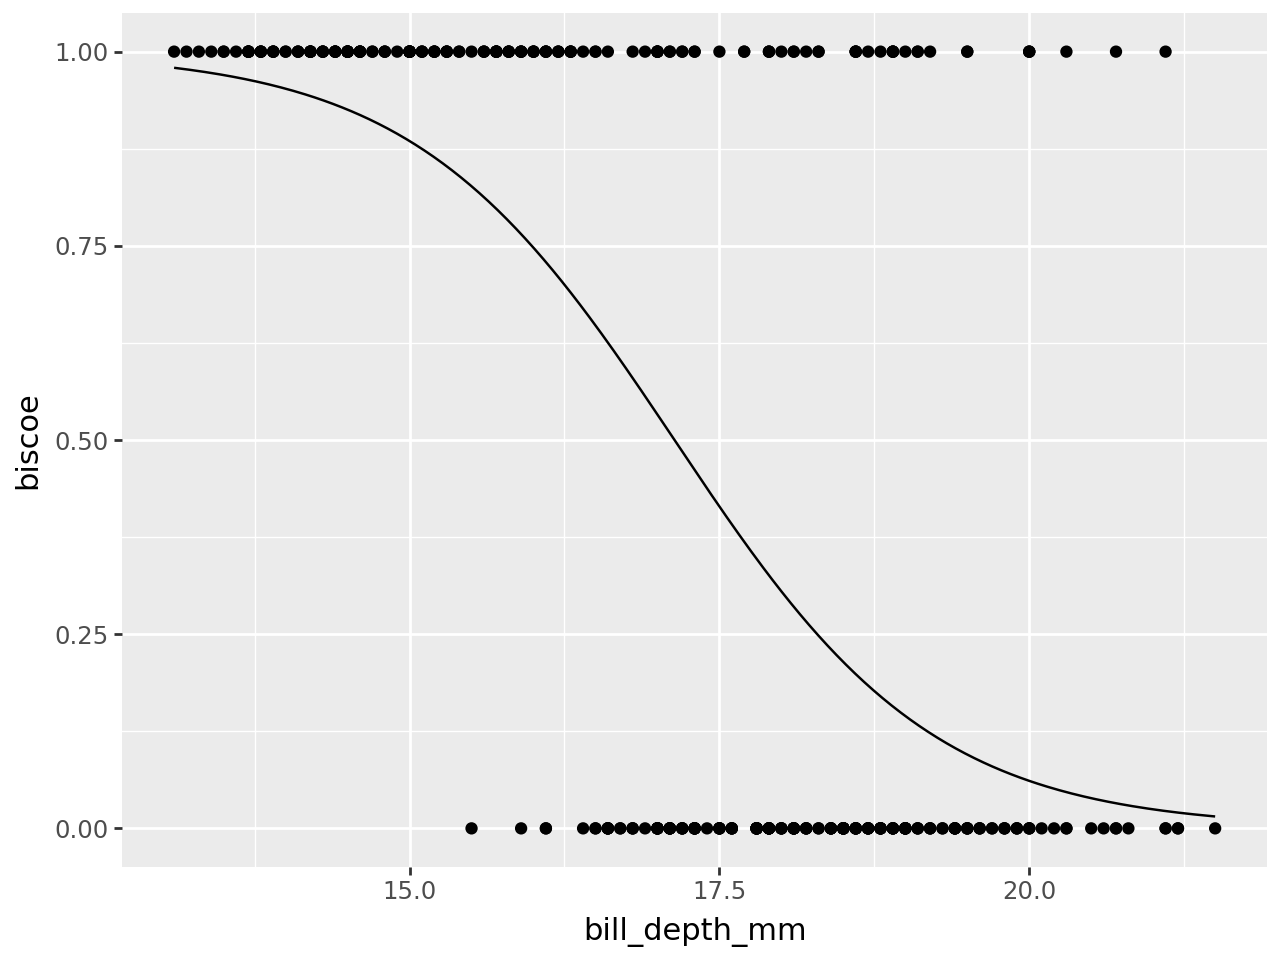

In [10]:
pn.ggplot(df2) + \
    pn.geom_point(pn.aes("bill_depth_mm", "biscoe")) + \
    pn.geom_line(pn.aes("x", "phat"))

In [11]:
lm = beta[0] + 19 * beta[1]
p1 = 1 / (1 + np.exp(-lm))

In [12]:
lm = beta[0] + 20 * beta[1]
p2 = 1 / (1 + np.exp(-lm))

In [13]:
p2 - p1

-0.08351087791758822

| Actual / Predicted | 0 | 1 |
|-------------------|---|---|
| 0 | True Negative 🥳 | False Positive 😵‍💫 |
| 1 | False Negative 😵‍💫 | True Positive 🥳 | 

In [14]:
cm = confusion_matrix(df2["biscoe"], fit.predict(X), 
                      normalize = "all")
cm

array([[0.42105263, 0.09064327],
       [0.11111111, 0.37719298]])

* [scikit-learn/Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)
* [Wikipedia/Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix)
* [scikit-learn/Confustion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix)

Fit logistic regression to `biscoe` with an interaction model between `bill_length_mm` and `bill_depth_mm`.

In [15]:
df2 = df.dropna(subset = ["biscoe", "bill_depth_mm", "bill_length_mm"])
y, X = pt.dmatrices("biscoe ~ bill_depth_mm * bill_length_mm", df2)
y = np.reshape(y, -1)
fit = LogisticRegression(fit_intercept = False, penalty = None).fit(X, y)

In [17]:
cm = confusion_matrix(df2["biscoe"], fit.predict(X), 
                      normalize = "all")
cm

array([[0.48245614, 0.02923977],
       [0.13157895, 0.35672515]])

In [18]:
np.sum(np.diag(cm))

0.8391812865497076

In [19]:
X

DesignMatrix with shape (342, 4)
  Intercept  bill_depth_mm  bill_length_mm  bill_depth_mm:bill_length_mm
          1           18.7            39.1                        731.17
          1           17.4            39.5                        687.30
          1           18.0            40.3                        725.40
          1           19.3            36.7                        708.31
          1           20.6            39.3                        809.58
          1           17.8            38.9                        692.42
          1           19.6            39.2                        768.32
          1           18.1            34.1                        617.21
          1           20.2            42.0                        848.40
          1           17.1            37.8                        646.38
          1           17.3            37.8                        653.94
          1           17.6            41.1                        723.36
          1       